In [1]:
suppressMessages(library(ArchR))
suppressMessages(library(Seurat))
suppressMessages(library(Signac))
suppressMessages(library(harmony))
suppressMessages(library(dplyr))
suppressMessages(library(cowplot))
suppressMessages(library(harmony))
suppressMessages(library(Nebulosa))
suppressMessages(library(ggpubr))
suppressMessages(library(Ipaper))
suppressMessages(library(phateR))
suppressMessages(library(parallel))

In [2]:
set.seed(42)
getwd()

addArchRThreads(threads = parallel::detectCores() - 2)
addArchRGenome("hg38")

[1] "/data/scATA/SingleCellOpenChromatin/local/VisiumHeartRevision/IntegrativeAnalysis/Fibroblast/code"

Setting default number of Parallel threads to 126.

Setting default genome to Hg38.



In [3]:
obj.atac <- readRDS("../data/snATAC_SCARA5_Myofib/snATAC.Rds")

In [4]:
## subset atac project
proj <- loadArchRProject("../data/snATAC_SCARA5_Myofib", showLogo = FALSE)

Successfully loaded ArchRProject!



In [ ]:
## add trajectory results from dm
proj@cellColData$SCARA5_Myofib_dm <- obj.atac@meta.data$SCARA5_Myofib_dm

In [5]:
## add harmony
embedding <- obj.atac@reductions$harmony@cell.embeddings
embedding <- embedding[rownames(proj), ]

proj@reducedDims[["Harmony"]] <- SimpleList(matDR = as.data.frame(embedding),
                                      params = NULL)

In [7]:
## add umap
embedding <- obj.atac@reductions$umap_harmony_v2@cell.embeddings
embedding <- embedding[rownames(proj), ]
colnames(embedding) <- c("Harmony#UMAP_Dimension_1",
                         "Harmony#UMAP_Dimension_2")

proj@embeddings[["umap"]] <- SimpleList(df = as.data.frame(embedding),
                                      params = NULL)


In [8]:
## add diffusion map
embedding <- obj.atac@reductions$dm@cell.embeddings[, 1:2]
embedding <- embedding[rownames(proj), ]
colnames(embedding) <- c("Harmony#DM_Dimension_1",
                         "Harmony#DM_Dimension_2")

proj@embeddings[["dm"]] <- SimpleList(df = as.data.frame(embedding),
                                      params = NULL)

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-dbcef4260548e-Date-2021-12-21_Time-10-08-41.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-dbcef4260548e-Date-2021-12-21_Time-10-08-41.log

ArchR logging to : ArchRLogs/ArchR-plotTrajectory-dbcef652ca0ba-Date-2021-12-21_Time-10-08-43.log
If there is an issue, please report to github with logFile!

Plotting

Plotting Trajectory

ArchR logging successful to : ArchRLogs/ArchR-plotTrajectory-dbcef652ca0ba-Date-2021-12-21_Time-10-08-43.log



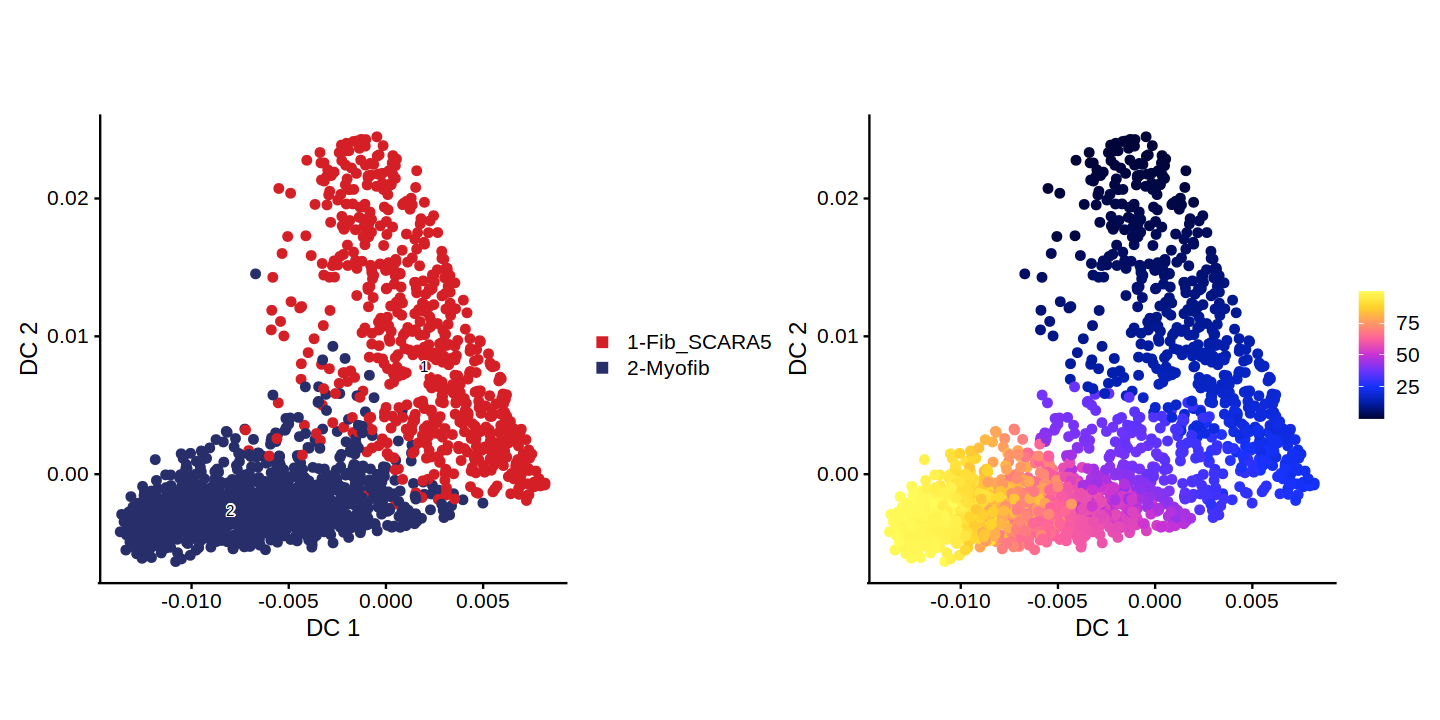

In [16]:
p1 <- plotEmbedding(proj, embedding = "dm",
                    colorBy = "cellColData",
                   name = "annotation",
                   plotAs = "points",
                   rastr = FALSE,
                   size = 2) +
    theme_cowplot() +
    xlab("DC 1") + ylab("DC 2") +
    ggtitle("") +
    theme(legend.title = element_blank())

p <- plotTrajectory(proj, 
                    trajectory = "SCARA5_Myofib_dm", 
                    colorBy = "cellColData", 
                    name = "SCARA5_Myofib_dm",
                   embedding = "dm",
                   addArrow = FALSE,
                   rastr = FALSE, 
                    plotAs = "points",
                   size = 2)

p2 <- p[[1]] + theme_cowplot() + ggtitle("") +
    xlab("DC 1") + ylab("DC 2")

options(repr.plot.height = 6, repr.plot.width = 12)

p1 + p2

In [ ]:
saveArchRProject(ArchRProj = proj, 
                 load = FALSE)

In [ ]:
sessionInfo()